In [1]:
# For data manipulation
import pandas as pd
import numpy as np
import zipfile

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# For models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats

In [2]:
# Pandas display options
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)

In [100]:
loan = pd.read_csv('outlier_removed.csv')
display(loan.shape)
loan.head()

(1787930, 20)

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mort_acc,charged_off,issue_y,earliest_cr_line_y
0,10000,36,8.81,A5,MORTGAGE,56000.0,Verified,debt_consolidation,AZ,20.53,7.0,1.0,10494,53.3,w,Individual,3.0,1,2018,10
1,10000,60,27.27,E5,RENT,70000.0,Source Verified,debt_consolidation,IL,11.37,4.0,0.0,3193,84.0,w,Individual,0.0,1,2018,13
2,4800,36,16.91,C5,MORTGAGE,111000.0,Source Verified,debt_consolidation,VA,13.35,12.0,0.0,2809,35.1,w,Individual,0.0,1,2018,15
3,35000,36,14.47,C2,RENT,95000.0,Source Verified,home_improvement,TX,11.61,5.0,0.0,5036,33.8,w,Individual,4.0,1,2018,16
4,16000,60,10.08,B1,RENT,45000.0,Not Verified,debt_consolidation,MN,25.52,10.0,0.0,10784,19.5,f,Individual,0.0,1,2018,8


# 1. Create Dummy Variables for Categorical Features

In [101]:
# find all the categorical variables
dummy = [column for column in loan.columns if loan[column].dtype == object]
dummy

['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [102]:
loan = pd.get_dummies(loan, columns=dummy, drop_first=True)
loan.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,charged_off,issue_y,earliest_cr_line_y,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,10000,36,8.81,56000.0,20.53,7.0,1.0,10494,53.3,3.0,1,2018,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000,60,27.27,70000.0,11.37,4.0,0.0,3193,84.0,0.0,1,2018,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4800,36,16.91,111000.0,13.35,12.0,0.0,2809,35.1,0.0,1,2018,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,35000,36,14.47,95000.0,11.61,5.0,0.0,5036,33.8,4.0,1,2018,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,16000,60,10.08,45000.0,25.52,10.0,0.0,10784,19.5,0.0,1,2018,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
loan.shape

(1787930, 118)

Text(0.5, 1.0, 'Correlation of Charged Off with Features')

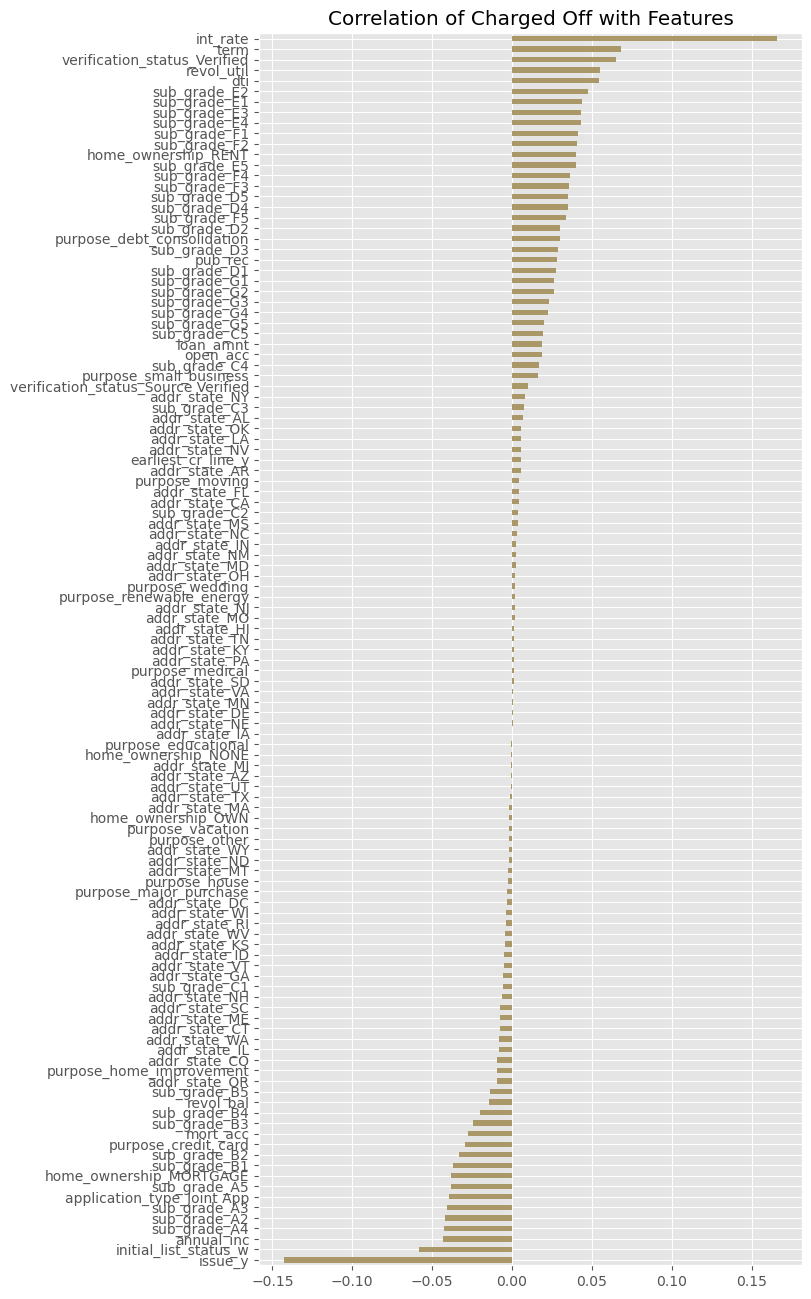

In [8]:
# show the correlation of each feature with target label
plt.figure(figsize=(7,16))
loan.corr().charged_off.sort_values()[:-1].plot.barh(color='#AA9868')
plt.title('Correlation of Charged Off with Features')

# 2. Train/Validation Set Split

In [84]:
X = loan.drop(columns=['charged_off'])
y = loan['charged_off']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=666)

In [86]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape:  ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape:  ", y_test.shape)

X_train.shape:  (1251551, 117)
X_test.shape:   (536379, 117)
y_train.shape:  (1251551,)
y_test.shape:   (536379,)


# 3. Downsampling

In [9]:
loan_positive = loan[loan['charged_off']==1]
loan_negative = loan[loan['charged_off']==0]
loan_positive.shape, loan_negative.shape

((131828, 118), (1656102, 118))

In [10]:
loan_negative_sample = loan_negative.sample(n=loan_positive.shape[0], random_state=666)
loan_positive.shape, loan_negative_sample.shape

((131828, 118), (131828, 118))

In [11]:
loan_downsample = pd.concat([loan_positive, loan_negative_sample])

In [12]:
X_down = loan_downsample.drop(columns=['charged_off'])
y_down = loan_downsample['charged_off']
X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.3,stratify=y_down, random_state=666)

# 4. Models

In [13]:
# define a function to output accuracy scor, classification report and confusion matrix
def output(model, xtrain, ytrain, xtest, ytest):
    test_pred = model.predict(xtest)
    train_pred = model.predict(xtrain)
    test_pred_prob = model.predict_proba(xtest)
    train_pred_prob = model.predict_proba(xtrain)
    train_roc_score = np.round(roc_auc_score(ytrain, train_pred_prob[:, 1], average='micro'),4)
    test_roc_score = np.round(roc_auc_score(ytest, test_pred_prob[:, 1], average='micro'),4)    
    train_acc_score = np.round(accuracy_score(ytrain, train_pred),4)
    test_acc_score = np.round(accuracy_score(ytest, test_pred),4)
    print('ROC score on train data:', train_roc_score)
    print('ROC score on test data:', test_roc_score)
    print('Accuracy score on train data:', train_acc_score)
    print('Accuracy score on test data:', test_acc_score)
    print('Classification Report:\n',classification_report(ytest, test_pred))
    print('Confusion Matrix:\n', confusion_matrix(ytest, test_pred))
    return (train_roc_score,test_roc_score,train_acc_score, test_acc_score)

# 4.1 Logistic Regression

Firstly, it's necessary to use the MinMaxScaler to normalize the data before feeding them into the LR model.

In [15]:
# normalize train and test data
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

Then apply the downsampled data to train the LR model.

In [16]:
%%time
lr = LogisticRegression(max_iter=1000)
lr.fit(X_down_train, y_down_train)

CPU times: total: 11.7 s
Wall time: 6.67 s


LogisticRegression(max_iter=1000)

In [17]:
perf_lr = output(lr, X_down_train, y_down_train, X_down_test, y_down_test)

ROC score on train data: 0.6922
ROC score on test data: 0.6908
Accuracy score on train data: 0.637
Accuracy score on test data: 0.6364
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64     39549
           1       0.64      0.62      0.63     39548

    accuracy                           0.64     79097
   macro avg       0.64      0.64      0.64     79097
weighted avg       0.64      0.64      0.64     79097

Confusion Matrix:
 [[26009 13540]
 [15222 24326]]


Text(0.5, 1.0, 'Confusion Matrix for the Logistic Regression Model')

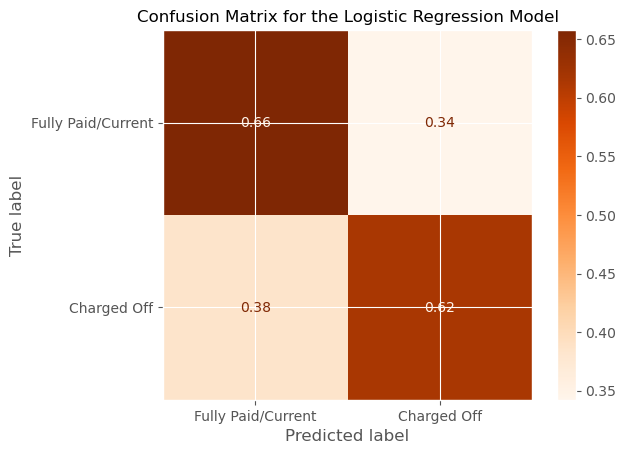

In [18]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(lr, X_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Logistic Regression Model', fontdict={'fontsize':12})

# 4.2 Decision Tree Classification

Apply the downsampled data to train the DT model.

In [36]:
%%time
dt = RandomForestClassifier()
dt.fit(X_down_train, y_down_train)

CPU times: total: 1min 51s
Wall time: 2min 16s


RandomForestClassifier()

In [37]:
perf_rf = output(dt, X_down_train, y_down_train, X_down_test, y_down_test)

ROC score on train data: 1.0
ROC score on test data: 0.7622
Accuracy score on train data: 1.0
Accuracy score on test data: 0.6953
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68     39549
           1       0.68      0.74      0.71     39548

    accuracy                           0.70     79097
   macro avg       0.70      0.70      0.69     79097
weighted avg       0.70      0.70      0.69     79097

Confusion Matrix:
 [[25643 13906]
 [10197 29351]]


Text(0.5, 1.0, 'Confusion Matrix for the Decision Tree Model')

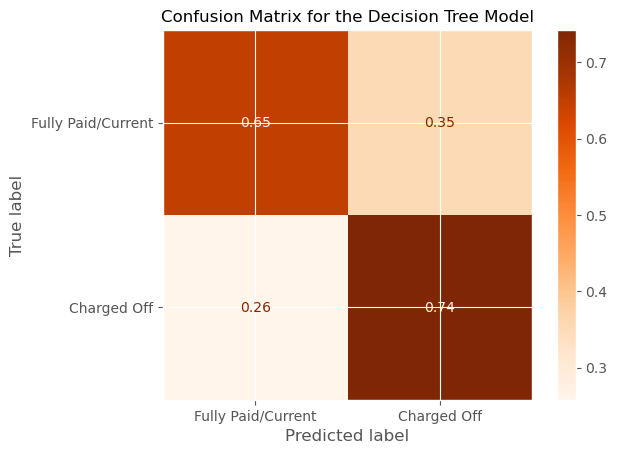

In [39]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(dt, X_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Decision Tree Model', fontdict={'fontsize':12})

Text(0.5, 1.0, 'Decision Tree Feature Importance')

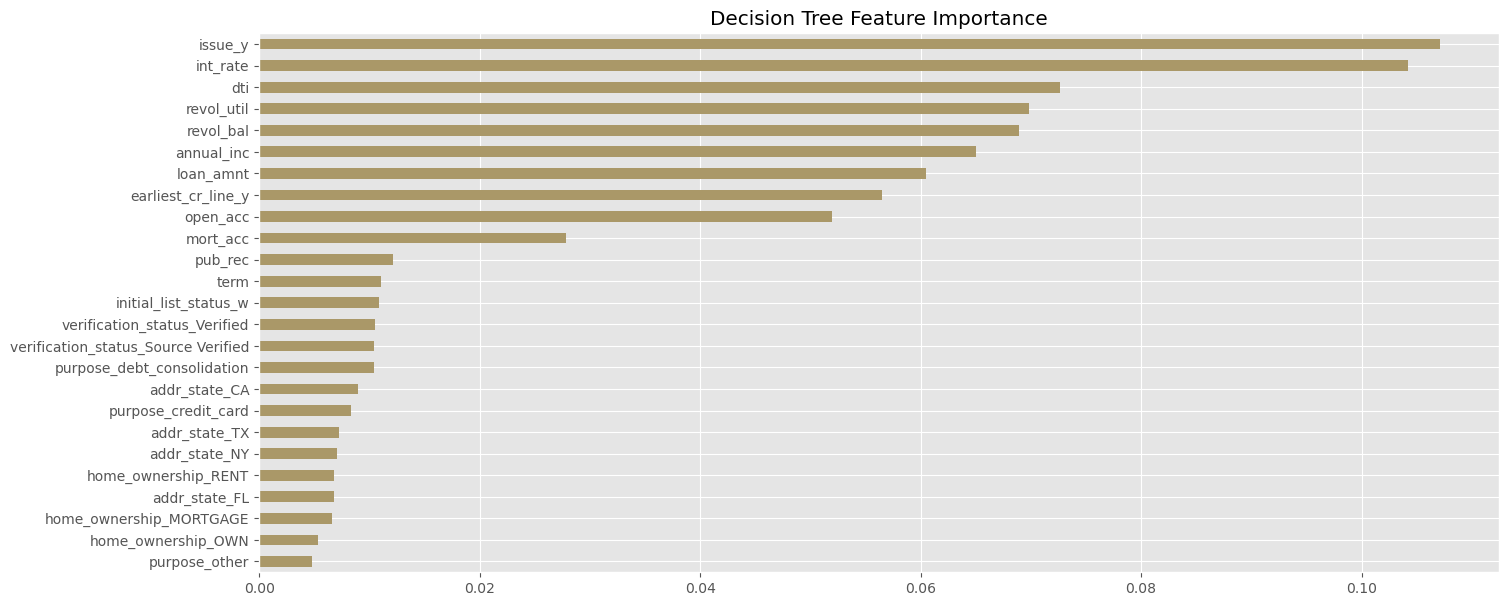

In [40]:
plt.figure(figsize=(16,7))
pd.Series(dt.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh',color='#AA9868') 
plt.title('Decision Tree Feature Importance')

# 4.3 Random Forest Classification

Apply the downsampled data to train the Rf model.

In [20]:
%%time
rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_down_train, y_down_train)

CPU times: total: 2min 25s
Wall time: 44 s


RandomForestClassifier(n_jobs=-1)

In [21]:
perf_rf = output(rf, X_down_train, y_down_train, X_down_test, y_down_test)

ROC score on train data: 1.0
ROC score on test data: 0.7621
Accuracy score on train data: 1.0
Accuracy score on test data: 0.6944
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68     39549
           1       0.68      0.74      0.71     39548

    accuracy                           0.69     79097
   macro avg       0.70      0.69      0.69     79097
weighted avg       0.70      0.69      0.69     79097

Confusion Matrix:
 [[25513 14036]
 [10139 29409]]


Text(0.5, 1.0, 'Confusion Matrix for the Random Forest Model')

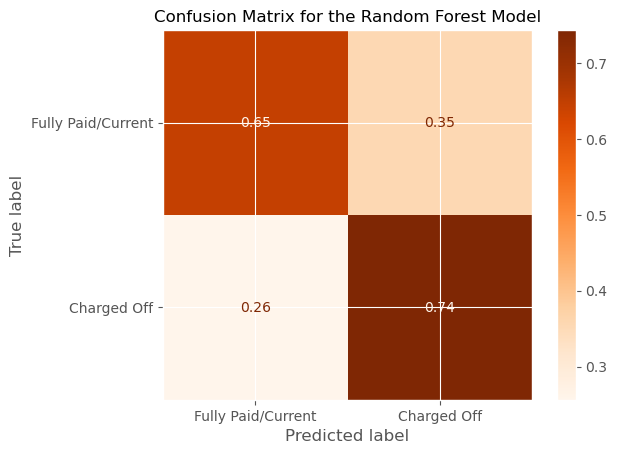

In [22]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(rf, X_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Random Forest Model', fontdict={'fontsize':12})

Text(0.5, 1.0, 'Random Forest Feature Importance')

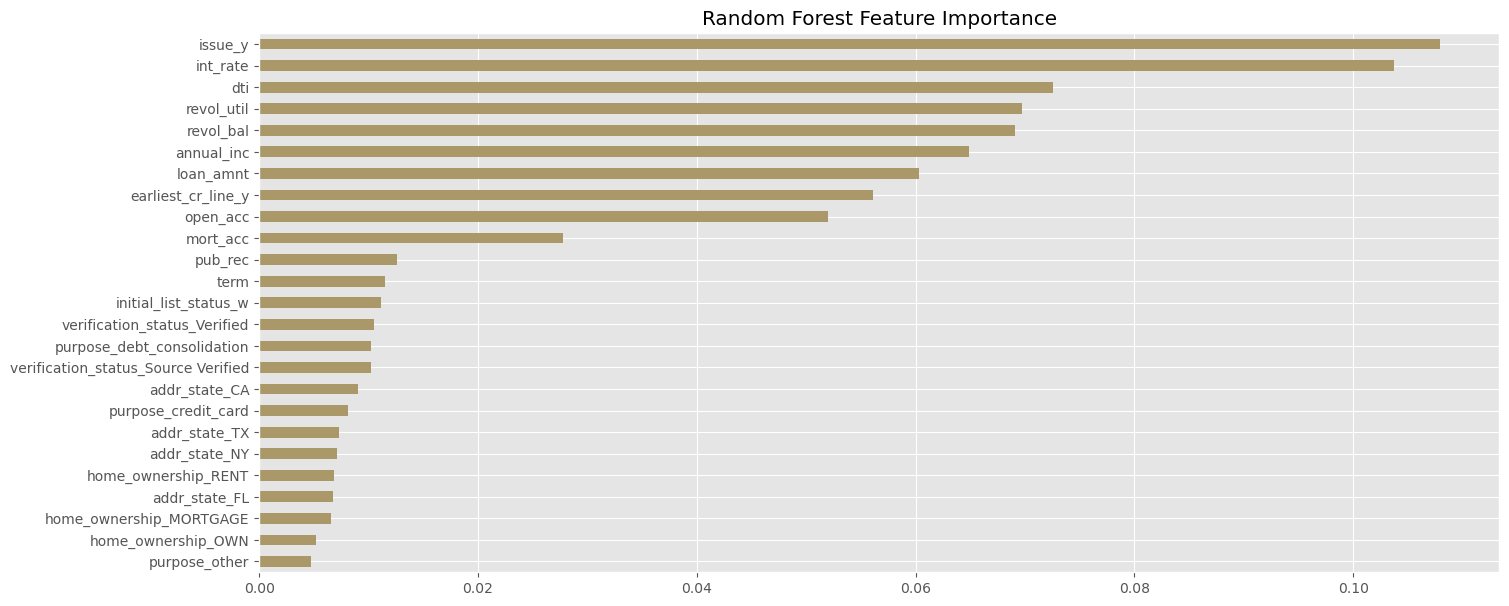

In [24]:
plt.figure(figsize=(16,7))
pd.Series(rf.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh',color='#AA9868') 
plt.title('Random Forest Feature Importance')

# 4.4 XGBoost Classification

In [26]:
%%time
xgb= XGBClassifier()
xgb.fit(X_down_train, y_down_train)

CPU times: total: 2min 42s
Wall time: 1min 22s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
perf_xgb = output(xgb, X_down_train, y_down_train, X_down_test, y_down_test)

ROC score on train data: 0.8115
ROC score on test data: 0.7694
Accuracy score on train data: 0.7325
Accuracy score on test data: 0.6983
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68     39549
           1       0.68      0.76      0.72     39548

    accuracy                           0.70     79097
   macro avg       0.70      0.70      0.70     79097
weighted avg       0.70      0.70      0.70     79097

Confusion Matrix:
 [[25215 14334]
 [ 9527 30021]]


Text(0.5, 1.0, 'Confusion Matrix for the XGBoost Model')

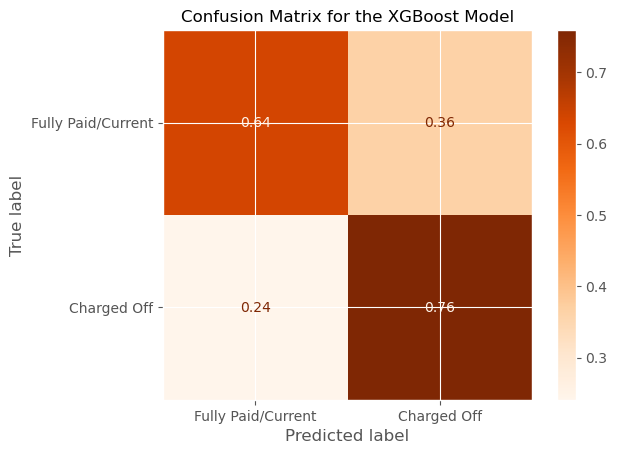

In [28]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(xgb, X_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the XGBoost Model', fontdict={'fontsize':12})

Text(0.5, 1.0, 'XGBoost Feature Importance')

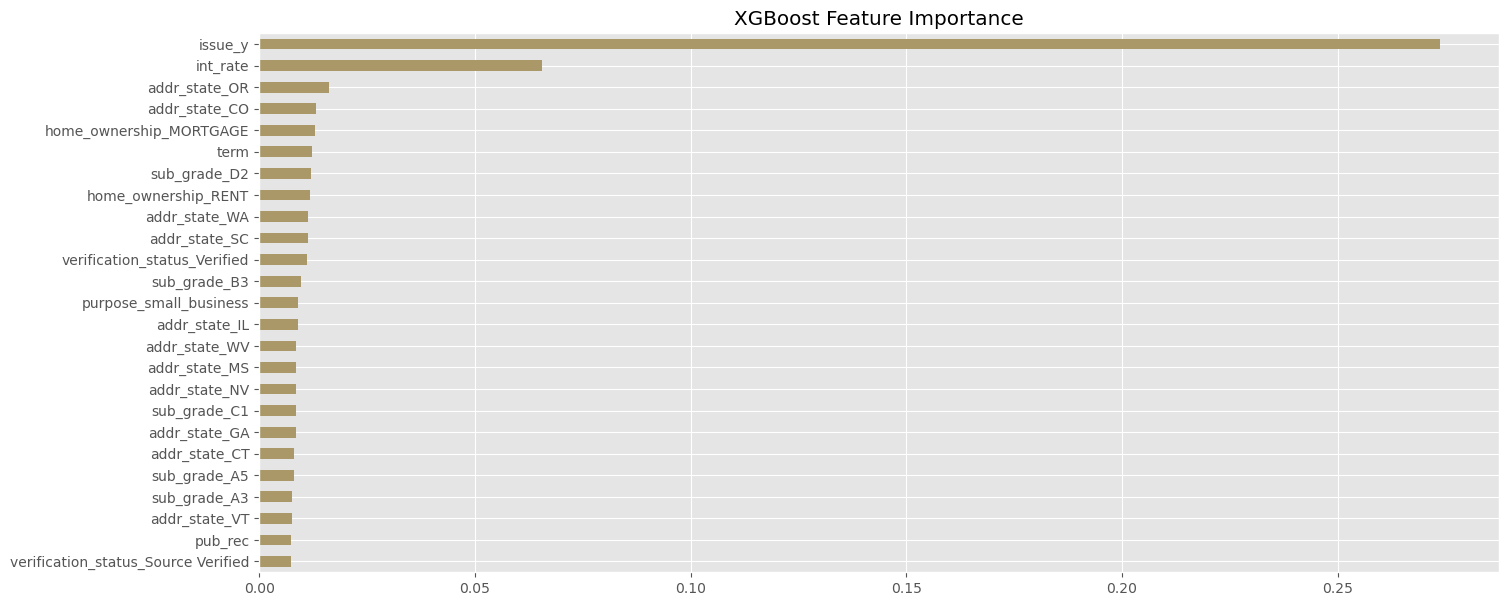

In [29]:
plt.figure(figsize=(16,7))
pd.Series(xgb.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh',color='#AA9868') 
plt.title('XGBoost Feature Importance')

The XGBoost model achieved 0.70 Accuracy Score and 0.77 AUROC Score, which is considered as the best model.

# 4.5 Hyper-parameter Tuning

Let's try some model tuning using randomized search cv based on XGBoost.

In [17]:
%%time
param_grid = dict(
    n_estimators=stats.randint(10, 500),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1),
    subsample=stats.uniform(0.5, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=60, 
    scoring='roc_auc', n_jobs=-1, verbose=1,
)
xgb_cv.fit(X_down_train, y_down_train)

best_params = xgb_cv.best_params_
print(f"Best Parameters: {best_params}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 62

Best Parameters: {'learning_rate': 0.1000695984086799, 'max_depth': 6, 'n_estimators': 188, 'subsample': 0.6355582882297452}
Wall time: 21min 13s


In [30]:
best_params = {'learning_rate': 0.1000695984086799,
 'max_depth': 6,
 'n_estimators': 188,
 'subsample': 0.6355582882297452}

In [73]:
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_down_train, y_down_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1000695984086799,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=188, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [74]:
perf_xgb_tuned = output(xgb_tuned, X_down_train, y_down_train, X_down_test, y_down_test)

ROC score on train data: 0.8024
ROC score on test data: 0.772
Accuracy score on train data: 0.7243
Accuracy score on test data: 0.7008
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68     39549
           1       0.68      0.76      0.72     39548

    accuracy                           0.70     79097
   macro avg       0.70      0.70      0.70     79097
weighted avg       0.70      0.70      0.70     79097

Confusion Matrix:
 [[25288 14261]
 [ 9402 30146]]


Text(0.5, 1.0, 'Confusion Matrix for the Tuned XGBoost Model')

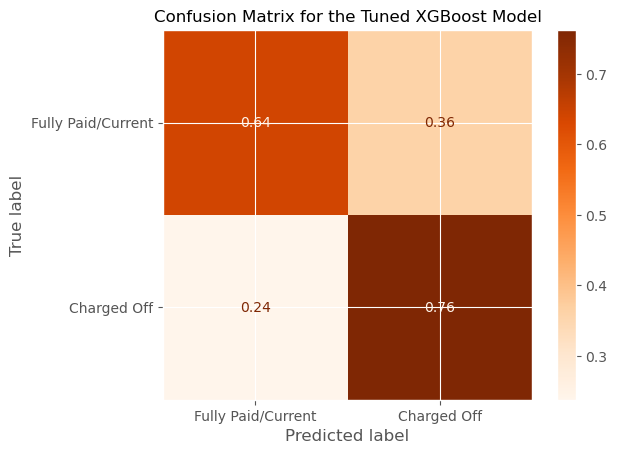

In [76]:
# show confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(xgb_tuned, X_down_test, y_down_test,
                                            display_labels=['Fully Paid/Current','Charged Off'], cmap=plt.cm.Oranges, normalize='true')
disp.ax_.set_title('Confusion Matrix for the Tuned XGBoost Model', fontdict={'fontsize':12})

Slightly improved on the accuracy and ROC score.

Text(0.5, 1.0, 'Tuned XGBoost Feature Importance')

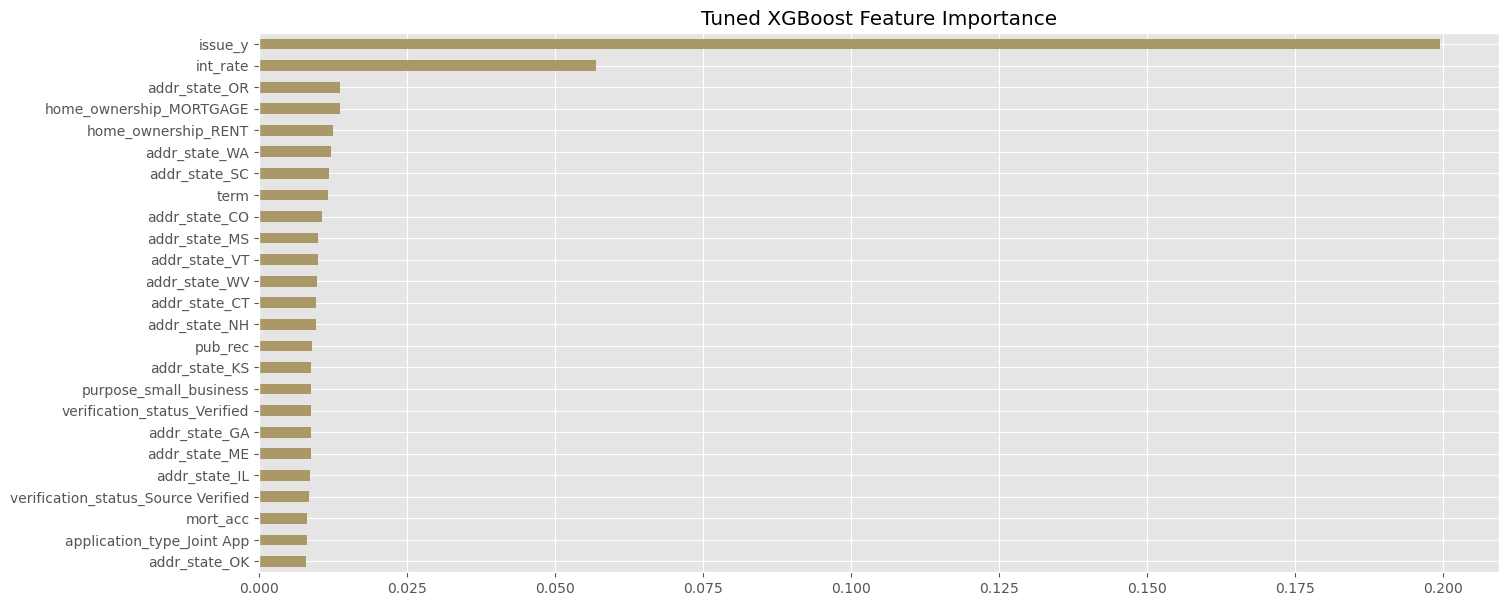

In [77]:
plt.figure(figsize=(16,7))
pd.Series(xgb_tuned.feature_importances_, index=X.columns).nlargest(25).sort_values().plot(kind='barh',color='#AA9868') 
plt.title('Tuned XGBoost Feature Importance')

# 5. Test Model

Firstly complete the same data processing to the test set.

In [87]:
# get the feature list
test_fea = pd.read_csv('outlier_removed.csv')
test_fea = list(test_fea.columns.values)
test_fea.remove('charged_off')
test_fea.remove('issue_y')
test_fea.remove('earliest_cr_line_y')
test_fea.append('issue_d')
test_fea.append('earliest_cr_line')
test_fea

['loan_amnt',
 'term',
 'int_rate',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'initial_list_status',
 'application_type',
 'mort_acc',
 'issue_d',
 'earliest_cr_line']

In [88]:
loan_test = pd.read_csv('updated_test_data_20200728.csv', usecols=test_fea)
loan_test.shape

(211627, 19)

In [89]:
loan_test['issue_y'] = pd.DatetimeIndex(loan_test['issue_d']).year.astype('Int64')
loan_test['earliest_cr_line_y'] = 2023-pd.DatetimeIndex(loan_test['earliest_cr_line']).year

loan_test.drop(columns=['issue_d','earliest_cr_line'], inplace=True)

In [90]:
def remove_outlier(df,col):
    '''
    This function is to keep data that are within +3 to -3 standard deviations in a column.
    Input:
    df: dataframe
    col: a column in data
    Output:
    A dataframe after removing outliers.
    '''
    mean = df[col].mean()
    std = df[col].std()
    return df[np.abs(df[col]-mean) <= (3*std)]

removel = ['annual_inc','dti','revol_bal','revol_util']
for col in removel:
    loan = remove_outlier(loan_test,col)
    print(f'After remove outliers from {col}, we have {loan_test.shape[0]} rows left.')

After remove outliers from annual_inc, we have 211627 rows left.
After remove outliers from dti, we have 211627 rows left.
After remove outliers from revol_bal, we have 211627 rows left.
After remove outliers from revol_util, we have 211627 rows left.


No outlier was removed from test set.

In [91]:
dummy = [column for column in loan.columns if loan[column].dtype == object]
loan_test = pd.get_dummies(loan_test, columns=dummy, drop_first=True)
loan_test.shape

(211627, 114)

In [98]:
list(loan_test.columns.values)

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'mort_acc',
 'issue_y',
 'earliest_cr_line_y',
 'term_ 60 months',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',


In [113]:
list(X_down_train.columns.values)

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'mort_acc',
 'issue_y',
 'earliest_cr_line_y',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_

Some features in test set have different values and location compared with the training set. I need to complete some rearrange job, since in sklearn, test models are typically based on the location of features rather than the name of features.

In [109]:
loan_test['term'] = loan_test['term_ 60 months'].map({1:60, 0:36})
loan_test.drop(columns='term_ 60 months', inplace=True)

In [111]:
loan_test['home_ownership_NONE'] = 0
loan_test['purpose_educational'] = 0
loan_test['addr_state_IA'] = 0

In [118]:
X_down_train.columns.values

array(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'mort_acc', 'issue_y',
       'earliest_cr_line_y', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpo

In [119]:
loan_test = loan_test.reindex(columns=['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'mort_acc', 'issue_y',
       'earliest_cr_line_y', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'addr_state_AL', 'addr_state_AR', 'addr_state_AZ', 'addr_state_CA',
       'addr_state_CO', 'addr_state_CT', 'addr_state_DC', 'addr_state_DE',
       'addr_state_FL', 'addr_state_GA', 'addr_state_HI', 'addr_state_IA',
       'addr_state_ID', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS',
       'addr_state_KY', 'addr_state_LA', 'addr_state_MA', 'addr_state_MD',
       'addr_state_ME', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO',
       'addr_state_MS', 'addr_state_MT', 'addr_state_NC', 'addr_state_ND',
       'addr_state_NE', 'addr_state_NH', 'addr_state_NJ', 'addr_state_NM',
       'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK',
       'addr_state_OR', 'addr_state_PA', 'addr_state_RI', 'addr_state_SC',
       'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT',
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY', 'initial_list_status_w',
       'application_type_Joint App'])

loan_test.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,issue_y,earliest_cr_line_y,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,1900,36,26.57,30000.0,46.88,13.0,0.0,3000,65.2,0.0,2016,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,10500,36,14.65,30000.0,21.76,10.0,0.0,15296,55.0,0.0,2015,13,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28000,60,11.80,108000.0,16.58,12.0,0.0,19236,21.5,1.0,2018,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,15000,36,14.52,70000.0,22.89,8.0,0.0,31401,62.4,0.0,2018,19,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35000,60,17.47,100000.0,22.28,18.0,0.0,10459,12.1,2.0,2018,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [121]:
loan_test.shape

(211627, 117)

In [127]:
miss_rate = pd.DataFrame(loan_test.isnull().mean().round(2).sort_values(ascending=False))
miss_rate.reset_index(inplace=True)
miss_rate.rename(columns={'index':'feature',0:'missing_rate'},inplace=True)
miss_rate

,feature,missing_rate
0,loan_amnt,0.0
1,addr_state_GA,0.0
2,addr_state_MI,0.0
3,addr_state_ME,0.0
4,addr_state_MD,0.0
5,addr_state_MA,0.0
6,addr_state_LA,0.0
7,addr_state_KY,0.0
8,addr_state_KS,0.0
9,addr_state_IN,0.0


No missing value in the test set.

Then apply tuned XGBoost model to test dataset.

In [125]:
pred = pd.DataFrame({'prediction_score': xgb_tuned.predict(loan_test)})
pred.reset_index(inplace=True)
pred

,index,prediction_score
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
211622,211622,1
211623,211623,1
211624,211624,1
211625,211625,1


In [126]:
pred.to_csv('predictions_rw.csv', index=False)